In [18]:
from avalanche.benchmarks import PermutedMNIST, RotatedMNIST
import torch
from Approaches.DistillationApproach import LwF
from Approaches.MemoryApproach import ER,A_GEM
from Approaches.RegularizationApproach import MAS,EWC
from Approaches.Approach import Naive
from utils import CNN, train_stream
from metrcis import BWT, ACC
import numpy as np
from avalanche.models import SimpleCNN

In [2]:
torch.manual_seed(100)
np.random.seed(100)

## Initialzing the models and Datasets

In [3]:
mas_model=CNN(num_classes=10)
ewc_model = CNN(num_classes=10)
naive_model = CNN(num_classes=10)
er_model = CNN(num_classes=10)
agem_model = CNN(num_classes=10)
lwf_model = CNN(num_classes=10)

permuted_mnist = PermutedMNIST(n_experiences=3,return_task_id=True)
rotated_mnist = RotatedMNIST(n_experiences=3,return_task_id=True,rotations_list=[0,-90,90])

In [4]:
device=torch.device("cuda:0")
epochs = 1

mas=MAS(mas_model, lambda_reg=1, device=device)
ewc=EWC(ewc_model, lambda_reg=1000, device=device)
er = ER(er_model, sampling_freq=0.3, n_samples=100, max_size=1000, device=device)
naive = Naive(naive_model, device=device)
agem = A_GEM(agem_model, n_samples=100, max_size=1000, device=device)
lwf = LwF(lwf_model, lambda_distill=2.5, device=device)

In [5]:
er, R_er = train_stream(benchmark=rotated_mnist, approach=er, epochs=epochs, device=device)
print("finished er")
agem, R_agem = train_stream(benchmark=rotated_mnist,approach=agem,epochs=epochs, device=device)
print("finished agem")
mas, R_mas = train_stream(benchmark=rotated_mnist,approach=mas,epochs=epochs, device=device)
print("finished mas")
ewc, R_ewc = train_stream(benchmark=rotated_mnist,approach=ewc,epochs=epochs, device=device)
print("finished ewc")
naive, R_naive = train_stream(benchmark=rotated_mnist,approach=naive,epochs=epochs, device=device)
print("finished naive")
lwf, R_lwf = train_stream(benchmark=rotated_mnist,approach=lwf,epochs=epochs, device=device)
print("finished lwf")

finished er


c:\Users\hthek\OneDrive\Desktop\Continual Learning\Basic CL Algorithms\Continual-Learning-Approaches\Approaches\MemoryApproach.py:125: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4416.)
  if grad.T @ ref_grad >= 0:


finished agem
finished mas
finished ewc
finished naive


c:\Users\hthek\anaconda3\envs\CL_env\Lib\site-packages\torch\nn\_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


finished lwf


In [6]:
R_lwf

array([[0.96709996, 0.1285    , 0.13779999],
       [0.51059997, 0.96209997, 0.41339999],
       [0.29179999, 0.5431    , 0.97729999]])

In [7]:
R_agem

array([[0.97279996, 0.1173    , 0.1178    ],
       [0.31990001, 0.98009998, 0.463     ],
       [0.28659999, 0.509     , 0.98229998]])

In [8]:
R_naive

array([[0.96639997, 0.1228    , 0.1601    ],
       [0.22379999, 0.97359997, 0.49039999],
       [0.1531    , 0.52739996, 0.98009998]])

In [9]:
R_er

array([[0.97729999, 0.1365    , 0.152     ],
       [0.86899996, 0.97469997, 0.4242    ],
       [0.86559999, 0.71569997, 0.96999997]])

In [10]:
R_ewc

array([[0.97099996, 0.13079999, 0.1758    ],
       [0.21259999, 0.96629995, 0.46159998],
       [0.1925    , 0.51279998, 0.96399999]])

In [11]:
R_mas

array([[0.96529996, 0.1173    , 0.1656    ],
       [0.3303    , 0.90599996, 0.37239999],
       [0.30019999, 0.54909998, 0.64789999]])

In [12]:
print("Naive BWT:",BWT(R_naive))
print("EWC BWT:",BWT(R_ewc))
print("MAS BWT:",BWT(R_mas))
print("ER BWT:",BWT(R_er))
print("A_GEM BWT:",BWT(R_agem))
print("LwF BWT:",BWT(R_lwf))

Naive BWT: -0.6297499909996986
EWC BWT: -0.6159999668598175
MAS BWT: -0.5109999775886536
ER BWT: -0.18535000085830688
A_GEM BWT: -0.5786499679088593
LwF BWT: -0.5471499711275101


In [13]:
print("Naive ACC:",ACC(R_naive))
print("EWC ACC:",ACC(R_ewc))
print("MAS ACC:",ACC(R_mas))
print("ER ACC:",ACC(R_er))
print("A_GEM ACC:",ACC(R_agem))
print("LwF ACC:",ACC(R_lwf))

Naive ACC: 0.5535333106915156
EWC ACC: 0.5564333200454712
MAS ACC: 0.49906665086746216
ER ACC: 0.8504333098729452
A_GEM ACC: 0.592633326848348
LwF ACC: 0.6040666600068411


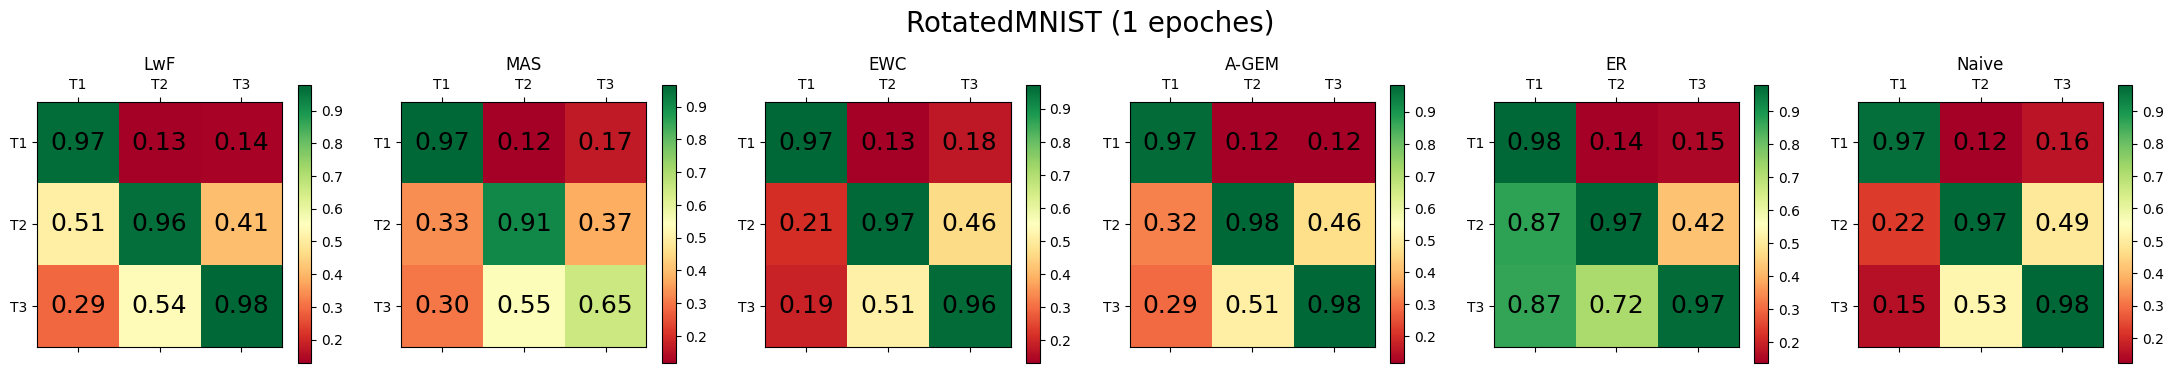

In [14]:
import matplotlib.pyplot as plt
methods = ["LwF", "MAS", "EWC", "A-GEM", "ER","Naive"]
matrices = [R_lwf, R_mas, R_ewc, R_agem, R_er,R_naive]

# add a dataset title (change as needed)
dataset_title = "RotatedMNIST (1 epoches)"

# ============================
# Plot
# ============================
fig, axes = plt.subplots(1, 6, figsize=(22, 4))

# big title above all subplots
fig.suptitle(dataset_title, fontsize=20)
# leave room for the suptitle when tight-layoutting
plt.tight_layout(rect=[0, 0, 1, 0.95])

for ax, R, title in zip(axes, matrices, methods):
    cax = ax.matshow(R,cmap='RdYlGn')       # no colormap specified (per your restriction)
    fig.colorbar(cax, ax=ax)

    num_tasks = R.shape[0]
    ax.set_xticks(range(num_tasks))
    ax.set_yticks(range(num_tasks))
    ax.set_xticklabels([f"T{j+1}" for j in range(num_tasks)])
    ax.set_yticklabels([f"T{i+1}" for i in range(num_tasks)])

    # Annotate each cell
    for i in range(num_tasks):
        for j in range(num_tasks):
            ax.text(j, i, f"{R[i, j]:.2f}", ha="center", va="center",fontsize=18,color='black')

    ax.set_title(title)
plt.show()


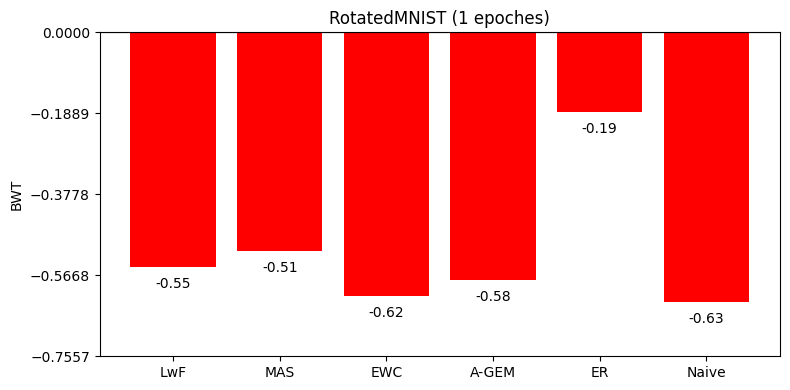

In [15]:
# ...existing code...
import numpy as np
import matplotlib.pyplot as plt

# example data (6 variables, some negative)
labels = ["LwF", "MAS", "EWC", "A-GEM", "ER","Naive"]
values = np.array([BWT(R_lwf),BWT(R_mas),BWT(R_ewc),BWT(R_agem),BWT(R_er),BWT(R_naive)])

# color positive green, negative red
colors = ["green" if v >= 0 else "red" for v in values]

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(labels, values, color=colors)

# show only negative y-axis: set ylim from min negative value to 0
min_val = values.min()
top = 0.0
bottom = min_val * 1.2 if min_val < 0 else -0.1  # ensure some negative range if no negatives
ax.set_ylim(bottom, top)

# keep only negative yticks
yticks = np.linspace(bottom, 0.0, 5)
ax.set_yticks(yticks)

# zero line and labels
ax.axhline(0, color="black", linewidth=0.8)
ax.set_ylabel("BWT")
ax.set_title("RotatedMNIST (1 epoches)")

# annotate bar values (place labels inside negative bars or above zero if positive - they'll be outside view)
for bar, v in zip(bars, values):
    if v < 0:
        y = v - (abs(bottom) * 0.03)
        va = "top"
    else:
        # positive labels will be off-plot; place at 0 for clarity
        y = 0.0 + (abs(bottom) * 0.03)
        va = "bottom"
    ax.text(bar.get_x() + bar.get_width() / 2, y, f"{v:.2f}", ha="center", va=va, fontsize=10)

plt.tight_layout()
plt.show()
# ...existing code...

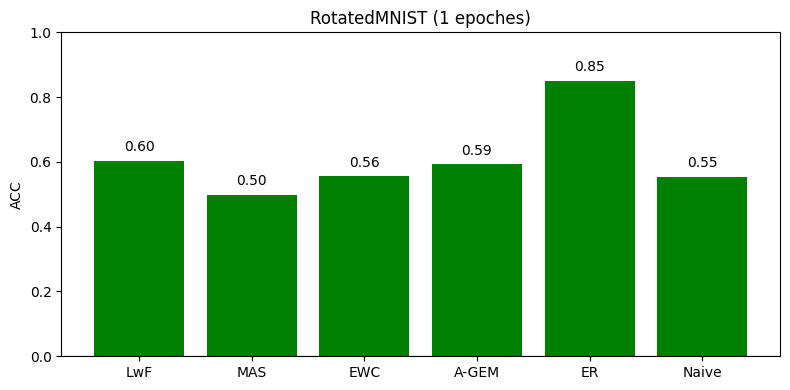

In [16]:
# ...existing code...
import numpy as np
import matplotlib.pyplot as plt

# 6 variables, use ACC instead of BWT
labels = ["LwF", "MAS", "EWC", "A-GEM", "ER", "Naive"]
values = np.array([ACC(R_lwf), ACC(R_mas), ACC(R_ewc), ACC(R_agem), ACC(R_er), ACC(R_naive)])

# color positives green, negatives red (negatives will be off-plot)
colors = ["green" if v >= 0 else "red" for v in values]

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(labels, values, color=colors)

# positive-only y axis: fixed max = 1.0
bottom = 0.0
top = 1.0
ax.set_ylim(bottom, top)

# set yticks between 0 and 1
yticks = np.linspace(bottom, top, 6)
ax.set_yticks(yticks)

# zero line, labels
ax.axhline(0, color="black", linewidth=0.8)
ax.set_ylabel("ACC")
ax.set_title("RotatedMNIST (1 epoches)")

# annotate bars: values placed above bars (clip_on=False so labels can sit above axis)
offset = 0.02 * (top - bottom)  # 2% of axis height
for bar, v in zip(bars, values):
    y = v + offset
    ax.text(bar.get_x() + bar.get_width() / 2, y, f"{v:.2f}", ha="center", va="bottom", fontsize=10, clip_on=False)

plt.tight_layout()
plt.show()

In [17]:
torch.save(agem_model,"A-GEM_RotatedMNIST_1Epoches.pt")
torch.save(lwf_model,"LwF_RotatedMNIST_1Epoches.pt")
torch.save(er_model,"ER_RotatedMNIST_1Epoches.pt")
torch.save(mas_model,"MAS_RotatedMNIST_1Epoches.pt")
torch.save(ewc_model,"EWC_RotatedMNIST_1Epoches.pt")
torch.save(naive_model,"Naive_RotatedMNIST_1Epoches.pt")